Name: Josemaria Macedo Carrillo\
Ttile: UN Data Analysis\
Created: 06/15/23\
Last modified:\
DSI

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [126]:
# First we import our destinations data and do some initial analysis
destinations = pd.read_csv("/Users/jmacedoc/Documents/DSI/Ukraine Agricultural Exports/oakland-institute-ukraine/data/bsgi_destinations.csv", thousands=",")

# What variables do we have in the dataset?
print("Variables:", destinations.columns)

# Which countries receive exports from Ukraine?
print("Countries of destination for Ukranian exports:", destinations.loc[:, "Country"].unique())

# How many countries are they?
print("Number of countries that get Ukrainian exports", destinations.loc[:, "Country"].nunique())


Variables: Index(['Country', 'ISO-3', 'Income group', 'Development category',
       'Least Developed Countries', 'UN region', 'Commodity',
       'total metric tons'],
      dtype='object')
Countries of destination for Ukranian exports: ['Afghanistan' 'Algeria' 'Bangladesh' 'Belgium' 'Bulgaria' 'China'
 'Djibouti' 'Egypt' 'Ethiopia' 'France' 'Georgia' 'Germany' 'Greece'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Jordan' 'Kenya' 'Lebanon' 'Libya' 'Malaysia' 'Morocco' 'Oman' 'Pakistan'
 'Portugal' 'Republic of Korea' 'Romania' 'Saudi Arabia' 'Somalia' 'Spain'
 'Sri Lanka' 'Sudan' 'Thailand' 'The Netherlands' 'Tunisia' 'Türkiye'
 'United Arab Emirates' 'United Kingdom' 'Viet Nam' 'Yemen']
Number of countries that get Ukrainian exports 45


In [127]:
# Helper functions

# Create cargo grouping function
def cargo_grouping(df, group, other_cols, sort, new_name = None):
    """
    Create grouped dataframes for charts

    Inputs:
        df(DataFrame): dataset to be used
        group(lst): list of columns to group by
        other_cols(lst): list columns that are going to be aggregated
        sortby(lst): list of columns to sort dataframe by. If new_name is not
            empty then the new column names should be used.
        new_name(lst): optional paramater with list of new names for grouped
            dataframe. Default is "None".

    Return(DataFrame): grouped dataframe for charts
    """
    cols = other_cols[:]
    cols.extend(group)
    df_g = df.loc[:, cols].groupby(group)

    if new_name is not None:
        col_dict = {}
        for i, col in enumerate(other_cols):
            col_dict[col] = new_name[i]
        grouped = df_g.sum().reset_index().rename(columns = col_dict) # PENDING: change this later to include any kind of aggregation
    else:
        grouped = df_g.sum().reset_index()

    return grouped.sort_values(by=sort, ascending=False)

Text(0.5, 1.0, 'Cargo exported by country')

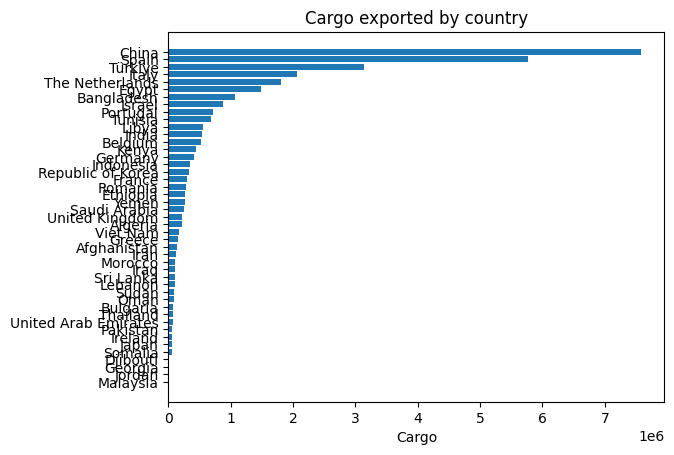

In [150]:
# Cargo exported by country chart (Graph 1). Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html

plt.rcdefaults()
fig, ax = plt.subplots()

graph_1 = cargo_grouping(destinations, ["Country"], ["total metric tons"], ["cargo"], ["cargo"])

countries = graph_1.loc[:, "Country"].unique()
y_pos = np.arange(graph_1.loc[:, "Country"].nunique())

# PENDING: PUT CARGO VALUES TO BARS AND SEPARATE COUNTRY NAMES AND CARGO VALUES MORE
ax.barh(y_pos, graph_1.loc[:, "cargo"], align='center')
ax.set_yticks(y_pos, labels=countries)
ax.invert_yaxis()
ax.set_xlabel('Cargo')
ax.set_title('Cargo exported by country')


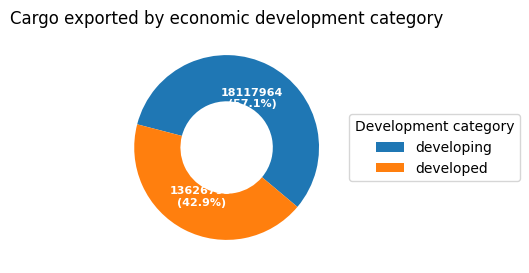

In [146]:
# Cargo exported by economic development. Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
graph_2 = cargo_grouping(destinations, ["Development category"], ["total metric tons"], ["cargo"], ["cargo"])

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute:d}\n({pct:.1f}%)"

wedges, texts, autotexts = ax.pie(graph_2.loc[:, "cargo"], autopct=lambda pct: func(pct, graph_2.loc[:, "cargo"]),
                                  textprops=dict(color="w"), wedgeprops=dict(width=0.5), startangle=-40)

ax.legend(wedges, graph_2.loc[:, "Development category"],
          title="Development category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Cargo exported by economic development category")

plt.show()
    